In [1]:
# This is an example of the comparison of images using the HOG technique
#
# Prepared by Juan D. Soler (soler@mpia.de)

import sys
sys.path.append('../')
from astrohog2d import *
from statests import *

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage

In [3]:
# Load the images that you want to compare
# astroHOG assumes that the cubes are spatially aligned and are reprojected into the same grid

hdul = fits.open('../data/testimage1.fits')
image1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testimage2.fits')
image2=hdul[0].data
hdul.close()

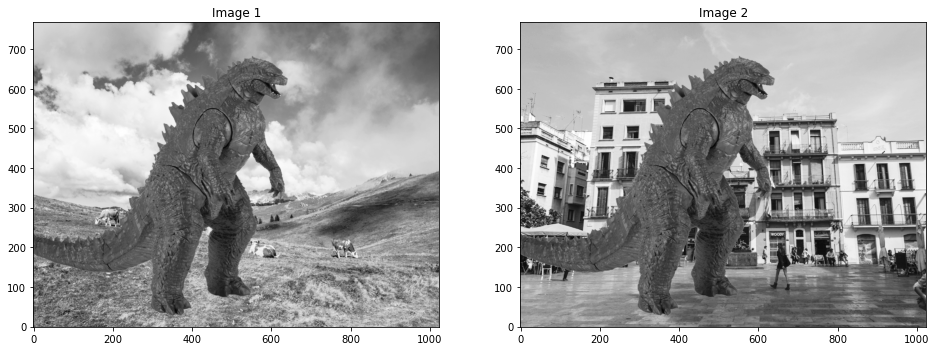

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16., 12.))
ax[0].imshow(image1, origin='lower', cmap='Greys_r')
ax[0].set_title('Image 1')
ax[1].imshow(image2, origin='lower', cmap='Greys_r')
ax[1].set_title('Image 2')
plt.show()

In [5]:
# Here you select the size of your derivative kernel in pixels
ksz=3

In [6]:
# Here I define the masks for both images
# For the sake of simplicity, I'm only masking the edges
sz1=np.shape(image1)
mask1=1.+0.*image1
mask1[0:ksz,:]=0.
mask1[sz1[0]-1-ksz:sz1[0]-1,:]=0.
mask1[:,0:ksz]=0.
mask1[:,sz1[1]-1-ksz:sz1[1]-1]=0.
sz2=np.shape(image2)
mask2=1.+0.*image2
mask2[0:ksz,:]=0.
mask2[sz2[0]-1-ksz:sz2[0]-1,:]=0.
mask2[:,0:ksz]=0.
mask2[:,sz2[1]-1-ksz:sz2[1]-1]=0.

In [14]:
# This should be the RMS of the map, 
# for the sake of the example I'm calculating this value from the map. 
s_ima1=np.std(image1) 
s_ima2=np.std(image2)

In [15]:
# Number of MC realizations of each map,
# so in the end you are calculating the HOG nruns*nruns times
nruns=5 

In [16]:
# Define the weights to account for the beam sampling
pixelsize=1.0
weights=(pixelsize/ksz)**2

In [17]:
# Calculate the relative orientation angles using the tools in the astroHOG package
circstats, corrframe, smoothframe1, smoothframe2 = HOGcorr_ima(image1, image2, 
                                                               ksz=ksz, 
                                                               mask1=mask1, mask2=mask2,
                                                               nruns=5,
                                                               weights=weights,
                                                               s_ima1=s_ima1, s_ima2=s_ima2)

  0%|          | 0/25 [00:00<?, ?it/s]

Running astroHOG Montecarlo ========================================


100%|██████████| 25/25 [00:11<00:00,  2.09it/s]


In [19]:
# 
print('Projected Rayleigh statistic (V) ', circstats[2], '+/-', circstats[5])

Projected Rayleigh statistic (V)  936.2965342517563 +/- 69.28166717714514


In [24]:
# Normalized to the number of pixels
ngood=np.size(np.logical_and(mask1 > 0., mask2 > 0.).nonzero())
#
print('Normalized Projected Rayleigh statistic (V) ', circstats[2]/ngood)

Normalized Projected Rayleigh statistic (V)  0.0006035047196730223
